_My notebook on_
# Python for Data Analysis - Wes McKinney
## Chapter 9 - Plotting and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 2 - Plotting with pandas and seaborn

Line Plots

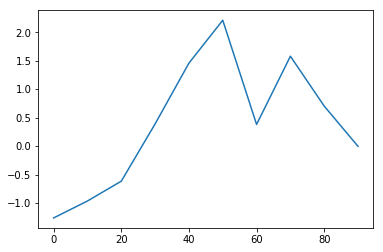

In [2]:
# Series plot
pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10)).plot()

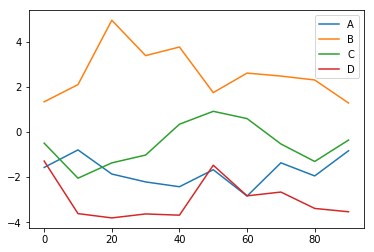

In [3]:
# Dataframe plot
pd.DataFrame(
    np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10)
).plot()

Bar Plots

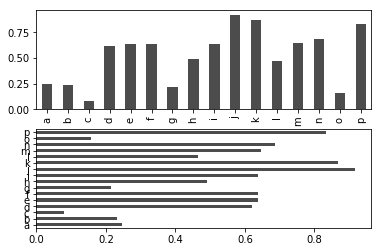

In [4]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Genus         A         B         C         D
one    0.661592  0.202544  0.152686  0.930052
two    0.338757  0.280718  0.497413  0.274298
three  0.397810  0.964597  0.270996  0.233791
four   0.134594  0.583997  0.925034  0.081427
five   0.296349  0.355143  0.378943  0.382003
six    0.719468  0.250046  0.737833  0.698438


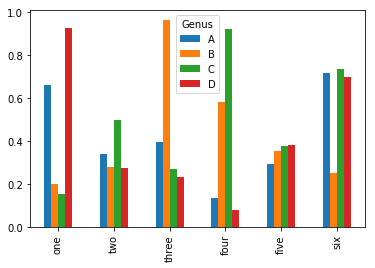

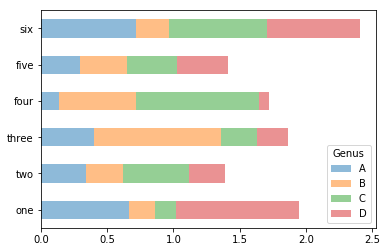

In [5]:
df = pd.DataFrame(
    np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus')
)

print(df)
df.plot.bar()

df.plot.barh(stacked=True, alpha=0.5)

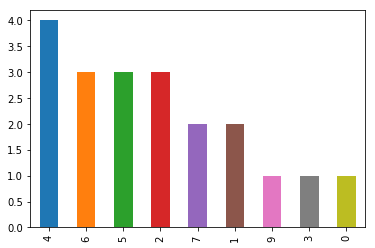

In [6]:
# values frequencies in a series
s = pd.Series(np.random.randint(0, 10, 20))
s.value_counts().plot.bar()

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3
size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241


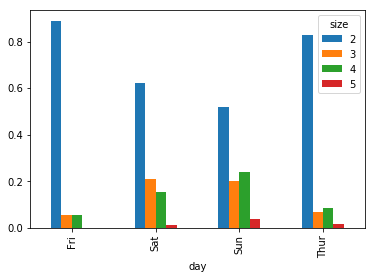

In [7]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts)

# skip first and last col
party_counts = party_counts.loc[:, 2:5]
# normalize to sum 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
print(party_pcts)

party_pcts.plot.bar()

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


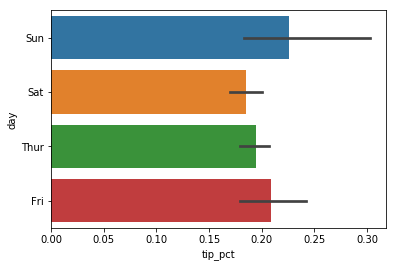

In [8]:
# mean and 95% confidence interval w/ seaborn

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())

sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

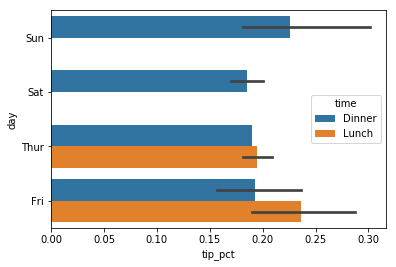

In [9]:
# seaborn hue to split an additional categorical value
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Histograms and Density Plots

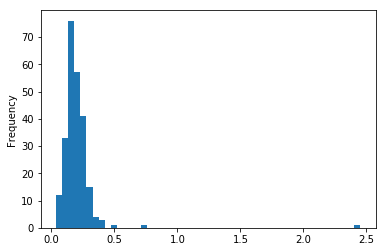

In [10]:
# calling the plot.hist() method on a Series (tip percentage)
tips['tip_pct'].plot.hist(bins=50)

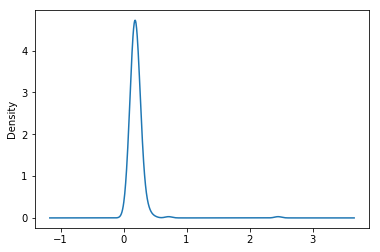

In [11]:
# density plot
tips['tip_pct'].plot.density()

D:\dev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


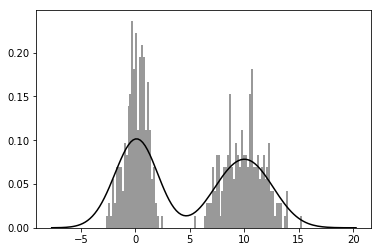

In [12]:
# histograms and density plots via seaborn
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

(-10, 20)

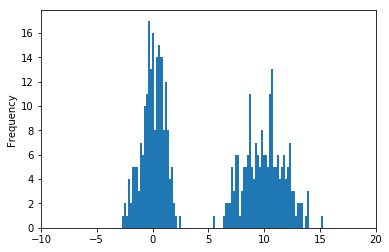

In [13]:
# w/o seaborn
values.plot.hist(bins=100)
plt.xlim([-10, 20])

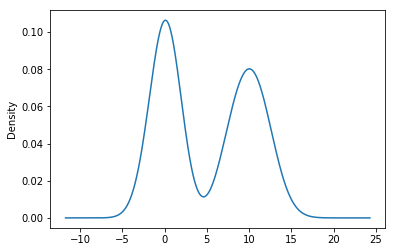

In [14]:
values.plot.density()

Scatter or Point Plots

          cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560


Text(0.5,1,'Changes in log m1 versus log unemp')

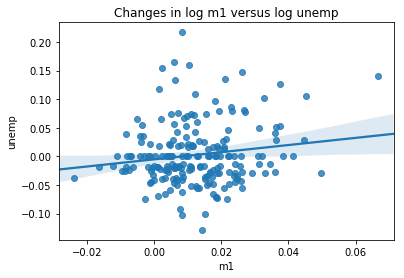

In [15]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
print(trans_data[-5:])

# scatter plot and linear regression line
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log {} versus log {}'.format('m1', 'unemp'))

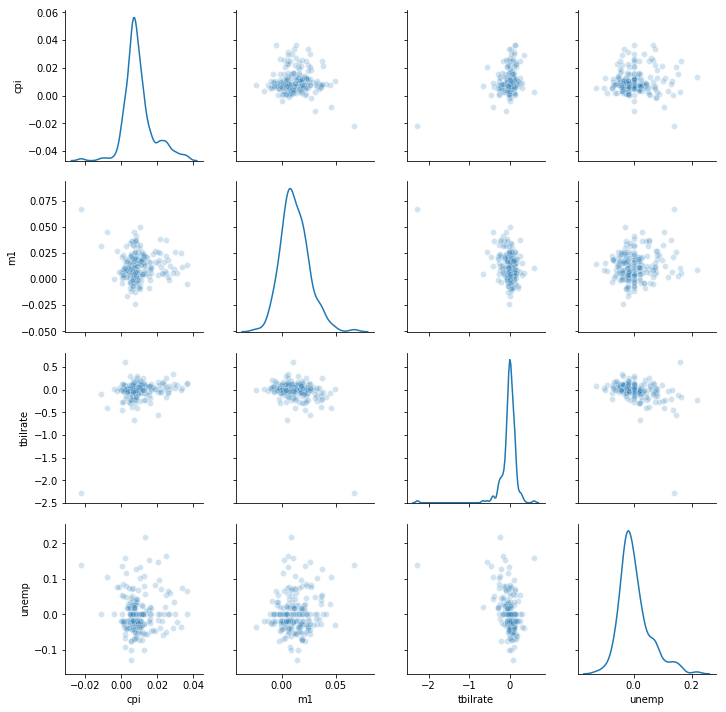

In [16]:
# pairs plot (aka scatter plot matrix) made simple through seaborn
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

Facet Grids and Categorical Data

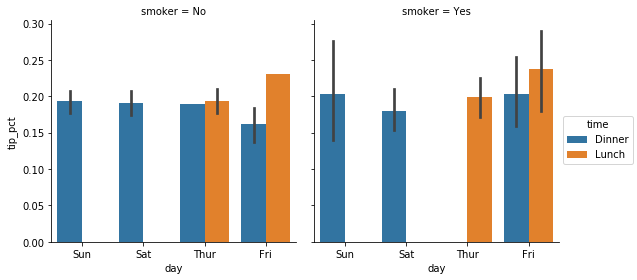

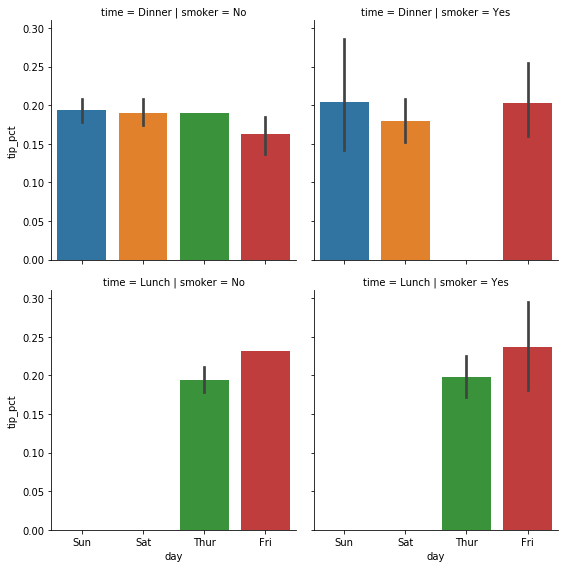

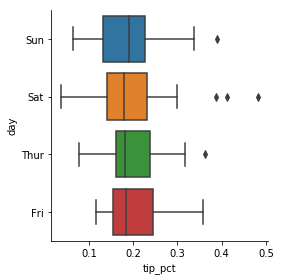

In [17]:
# faceted plots with seaborn
sns.factorplot(
    x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

# facet grid on rows and cols
sns.factorplot(
    x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

# boxplot on factorplot
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])